## cl - Cloud fraction in vertical coordinate layer (high clouds)

Low Cloud Fraction (LCF) - maximum cloud fraction from 250-100 hpa <br>

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy

from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [2]:
from plotFuncs import *

In [3]:
from myFuncs import *

### one dataset

In [4]:
variable = 'cloudFraction'

models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'bcc-csm1-1',   # 4
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'inmcm4',       # 13 
    # 'NorESM1-M',    # 14 
    # 'CanESM2',      # 15 
    # 'MIROC5',       # 16 
    # 'MRI-CGCM3',    # 18 
    ]

observations = [
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:cloudFraction, dataset:GFDL-CM3, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (time: 360, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    cl_low   (time, lat, lon) float64 ...
    cl_high  (time, lat, lon) float64 ...
Attributes:
    description:  Cloud fraction calculated as maximum between pressure level...

In [5]:
data = ds['cl_high']
data

<xarray.DataArray 'cl_high' (time: 360, lat: 22, lon: 128)>
[1013760 values with dtype=float64]
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

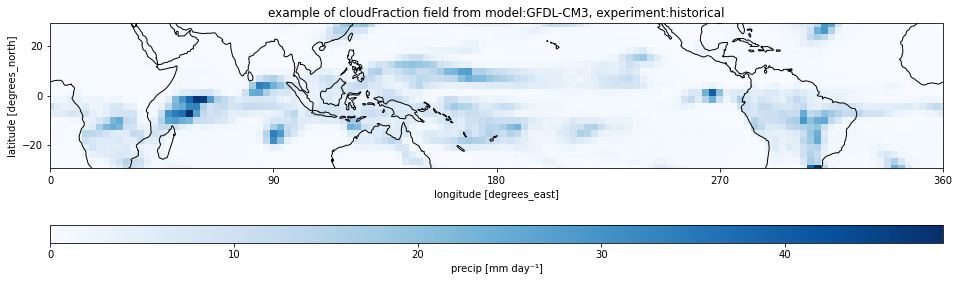

In [6]:
scene = get_dsvariable('precip', datasets[0],experiments[0],home, resolutions[0])['precip'].isel(time=0)
title = 'example of {} field from model:{}, experiment:{}'.format(variable, datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

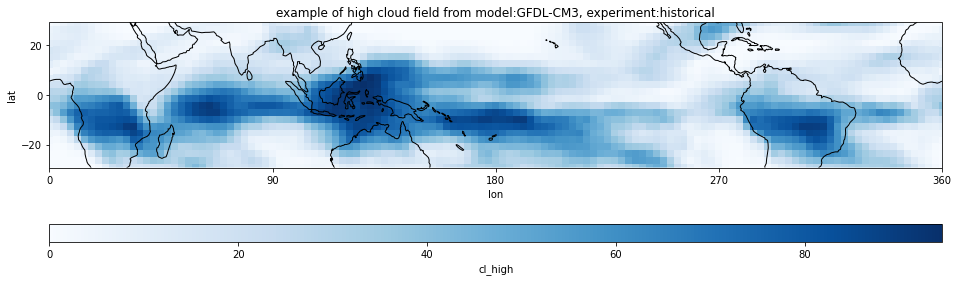

In [7]:
scene = data.isel(time=0)
title = 'example of {} field from model:{}, experiment:{}'.format('high cloud', datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

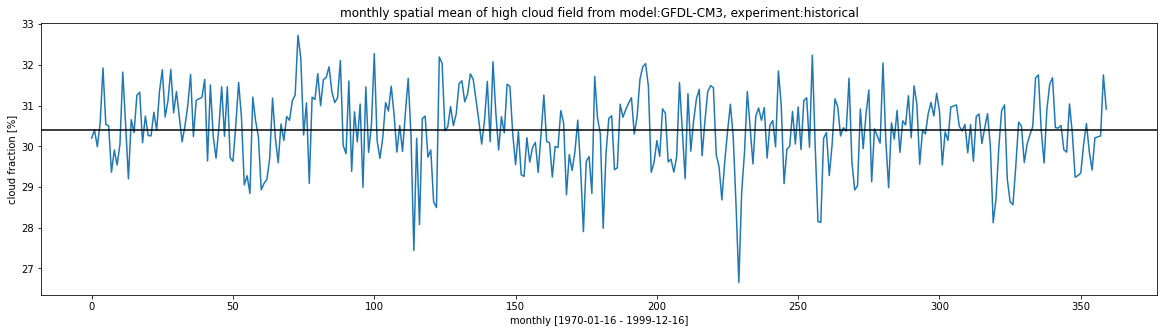

In [8]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

aWeights = np.cos(np.deg2rad(data.lat))
y= data.weighted(aWeights).mean(dim=('lat','lon'))
title = '{} spatial mean of {} field from model:{}, experiment:{}'.format(timeMean_options[0], 'high cloud', datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = 'cloud fraction [{}]'.format('%')

plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

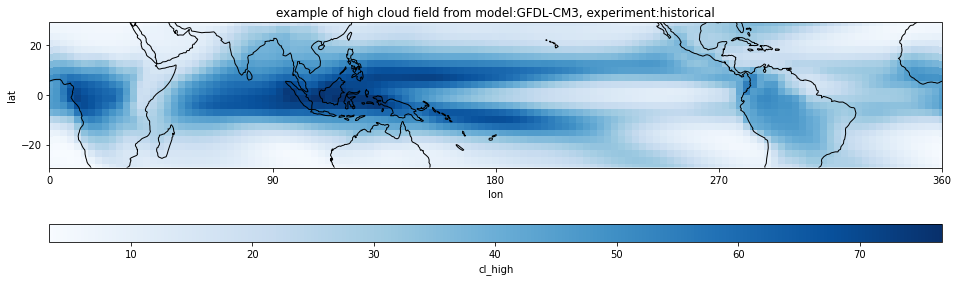

In [9]:
scene = data.mean(dim='time')
title = 'example of {} field from model:{}, experiment:{}'.format('high cloud', datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

### comparing datasets

In [10]:
variable = 'cloudFraction'

models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'bcc-csm1-1',   # 4
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'inmcm4',       # 13 
    'NorESM1-M',    # 14 
    'CanESM2',      # 15 
    'MIROC5',       # 16 
    'MRI-CGCM3',    # 18 
    ]

observations = [
    ]

datasets = models + observations

experiments =[
    'historical',
    # 'rcp85'
    ]

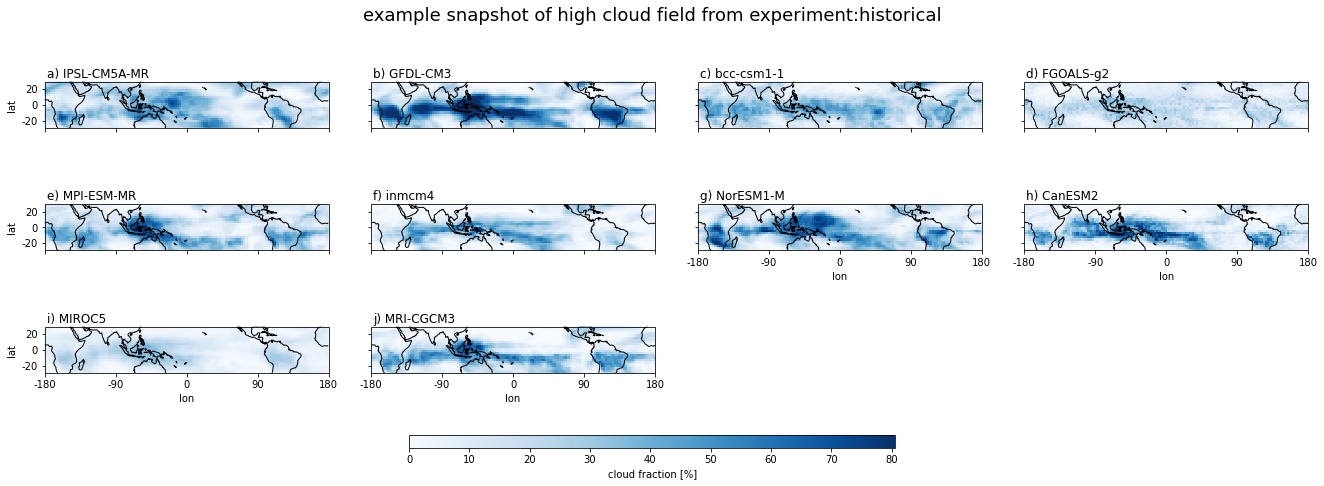

In [11]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.95
if absolute_limits:
    vmin, vmax1 = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['cl_high'].isel(time=0)
        y= data
        
        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax1 = np.append(vmax1, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax1)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'example snapshot of {} field from experiment:{}'.format('high cloud', experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.75)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(3,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    data = get_dsvariable(variable, dataset, experiments[0])['cl_high'].isel(time=0)
    y = data

    cmap = 'Blues'
    pcm = plot_scene(y, cmap=cmap, zorder=0, ax=ax, vmin=vmin, vmax=vmax)
    
    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.825)
cbar_ax = fig.add_axes([0.425, 0.4, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('cloud fraction', '%'))

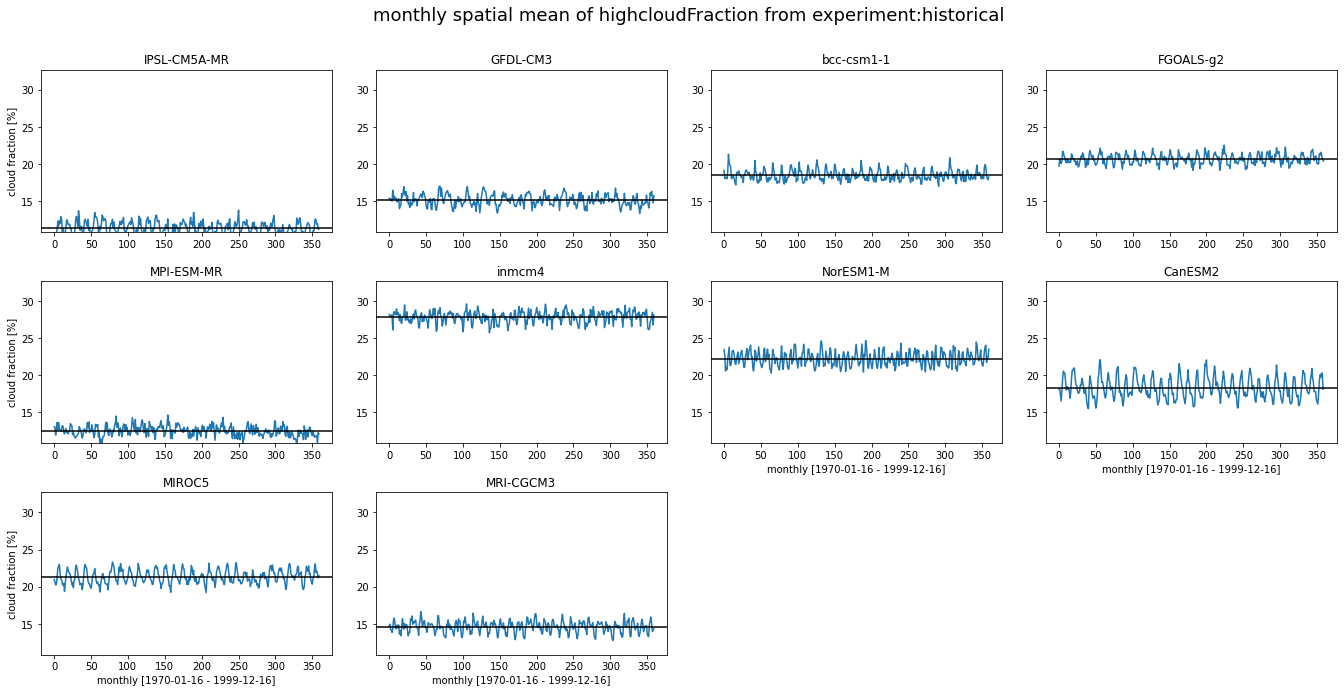

In [12]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0])['cl_high']
        aWeights = np.cos(np.deg2rad(data.lat))
        y = data.weighted(aWeights).mean(dim=('lat','lon'))

        if timeMean_options[0] == 'annual':
            y = y.resample(time='Y').mean(dim='time', keep_attrs=True)

        if timeMean_options[0] == 'seasonal':
            y = y.resample(time='QS-DEC').mean(dim="time")
            y = to_monthly(y)
            y = y.rename({'month':'season'})
            y = y.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])
            y = y.isel(year=slice(1, None))

        if timeMean_options[0] == 'monthly':
            y = y.resample(time='M').mean(dim='time', keep_attrs=True)

        if timeMean_options[0] == 'daily':
            y = y

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} spatial mean of {} from experiment:{}'.format(timeMean_options[0], 'high' + variable, experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)

    ds = get_dsvariable(variable, dataset, experiments[0])
    data = ds['cl_low']

    if len(np.shape(data))>2:
        aWeights = np.cos(np.deg2rad(data.lat))
        y= data.weighted(aWeights).mean(dim=('lat','lon'))
    else:
        y = data

    title = dataset
    plot_timeseries(y, title=title, timeMean_option=timeMean_options, ax=ax, ymin=vmin, ymax=vmax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
        plt.xlabel(xlabel)

        if timeMean_options[0]=='seasonal':
            plt.legend()

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'cloud fraction [{}]'.format('%')
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

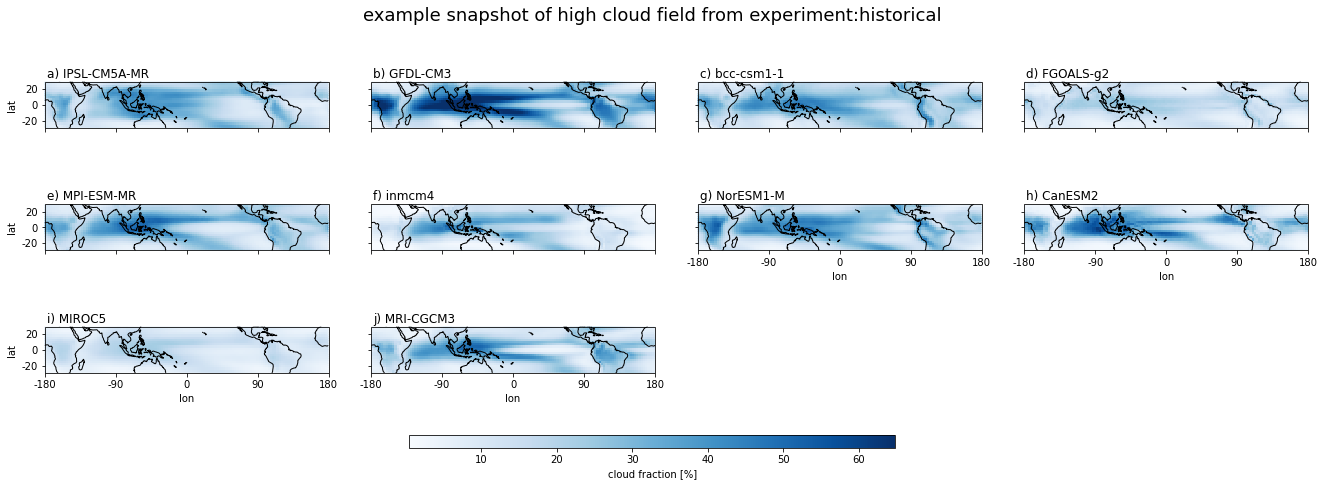

In [13]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.95
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['cl_high'].mean(dim='time')
        y= data
        
        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'example snapshot of {} field from experiment:{}'.format('high cloud', experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.75)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(3,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    data = get_dsvariable(variable, dataset, experiments[0])['cl_high'].mean(dim='time')
    y = data

    cmap = 'Blues'
    pcm = plot_scene(y, cmap=cmap, zorder=0, ax=ax, vmin=vmin, vmax=vmax)
    
    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.825)
cbar_ax = fig.add_axes([0.425, 0.4, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('cloud fraction', '%'))

Text(0, 0.5, 'cloud fraction [%]')

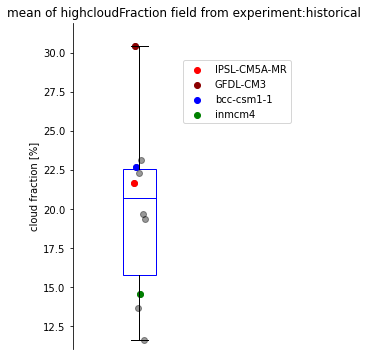

In [14]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'bcc-csm1-1',   # 4
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    'inmcm4',       # 13 
    # 'NorESM1-M',    # 14 
    # 'CanESM2',      # 15 
    # 'MIROC5',       # 16 
    # 'MRI-CGCM3',    # 18 
    ]

colors = [
    'r',
    'darkred',
    'b', 
    'g'
    ]

absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0])['cl_high']
        aWeights = np.cos(np.deg2rad(data.lat))
        y = data.weighted(aWeights).mean(dim=('time','lat','lon'))

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 



plt.figure(figsize=(4,6))
title = 'mean of {} field from experiment:{}'.format('high' + variable, experiments[0])
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:
    data = get_dsvariable(variable, dataset, experiments[0])['cl_high']
    aWeights = np.cos(np.deg2rad(data.lat))
    y_data = data.weighted(aWeights).mean(dim=('time','lat','lon'))

    y = np.append(y, y_data)

data.attrs['units'] = 'mm day' + chr(0x207B)+ chr(0x00B9)
plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    for i, label in enumerate(labels):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], label=label)
        plt.legend(bbox_to_anchor=(0.6,0.5,0.4,0.4))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title)
plt.ylabel('cloud fraction [{}]'.format('%'))

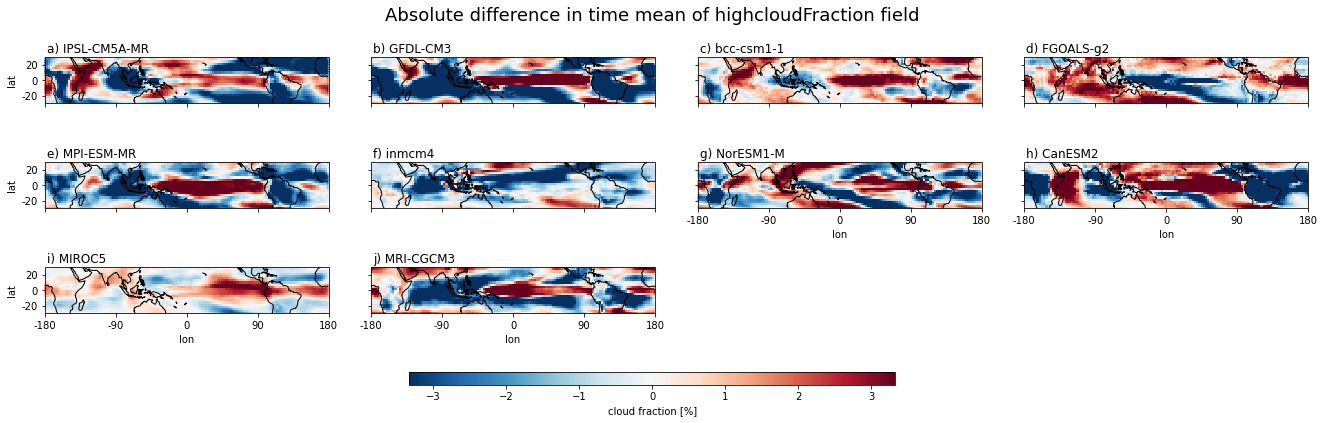

In [15]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.95
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        if dataset == 'GPCP':
            continue
        
        data_historical = get_dsvariable(variable, dataset, experiment='historical')['cl_high'].mean(dim='time')
        data_rcp = get_dsvariable(variable, dataset, experiment='rcp85')['cl_high'].mean(dim='time')
        aWeights = np.cos(np.deg2rad(data_historical.lat))

        tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        
        datadiff = data_rcp - data_historical
        # datadiff = (datadiff/data_historical)*100

        # tasdiff = tas_rcp85 - tas_historical
        # datadiff = datadiff/tasdiff

        y= datadiff

    vmin = np.append(vmin, np.quantile(y, quantile_low))
    vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Absolute difference in time mean of {} field'.format('high' + variable)

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
            
    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    data_historical = get_dsvariable(variable, dataset, experiment='historical')['cl_high'].mean(dim='time')
    data_rcp = get_dsvariable(variable, dataset, experiment='rcp85')['cl_high'].mean(dim='time')
    aWeights = np.cos(np.deg2rad(data_historical.lat))

    tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    
    datadiff = data_rcp - data_historical
    # datadiff = (datadiff/data_historical)*100

    # tasdiff = tas_rcp85 - tas_historical
    # datadiff = datadiff/tasdiff

    # datadiff.attrs['units'] = '% K'+ chr(0x207B) + chr(0x00B9) 

    y= datadiff
    cmap = 'RdBu_r'

    pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=-vmax, vmax=vmax)
    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])


plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)
cbar_ax = fig.add_axes([0.425, 0.5, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('cloud fraction', '%'))


(-4.0, 2.0)

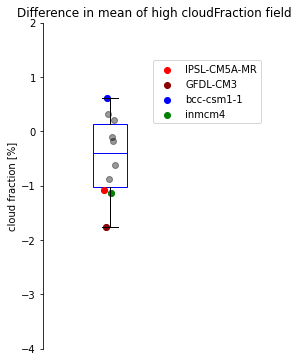

In [16]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'bcc-csm1-1',   # 4
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    'inmcm4',       # 13 
    # 'NorESM1-M',    # 14 
    # 'CanESM2',      # 15 
    # 'MIROC5',       # 16 
    # 'MRI-CGCM3',    # 18 
    ]

colors = [
    'r',
    'darkred',
    'b', 
    'g'
    ]


absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        
        data = get_dsvariable(variable, dataset, experiments[0])['cl_high']
        aWeights = np.cos(np.deg2rad(data.lat))
        data_historical = get_dsvariable(variable, dataset, experiment='historical')['cl_high'].weighted(aWeights).mean(dim=('time','lat','lon'))
        data_rcp = get_dsvariable(variable, dataset, experiment='rcp85')['cl_high'].weighted(aWeights).mean(dim=('time','lat','lon'))

        tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))

        datadiff = data_rcp - data_historical
        # datadiff = (datadiff/data_historical)*100

        # tasdiff = tas_rcp85 - tas_historical
        # datadiff = datadiff/tasdiff

        y= datadiff

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 



plt.figure(figsize=(4,6))
title = 'Difference in mean of {} field'.format('high ' + variable)
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:

    data = get_dsvariable(variable, dataset, experiments[0])['cl_high']
    aWeights = np.cos(np.deg2rad(data.lat))
    data_historical = get_dsvariable(variable, dataset, experiment='historical')['cl_high'].weighted(aWeights).mean(dim=('time','lat','lon'))
    data_rcp = get_dsvariable(variable, dataset, experiment='rcp85')['cl_high'].weighted(aWeights).mean(dim=('time','lat','lon'))

    tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))

    datadiff = data_rcp - data_historical
    # datadiff = (datadiff/data_historical)*100

    # tasdiff = tas_rcp85 - tas_historical
    # datadiff = datadiff/tasdiff

    y = np.append(y, datadiff)

data.attrs['units'] = '% K'+ chr(0x207B) + chr(0x00B9) 
    
plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    for i, label in enumerate(labels):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], label=label)
        plt.legend(bbox_to_anchor=(0.6,0.5,0.4,0.4))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title)
plt.ylabel('cloud fraction [{}]'.format('%'))
plt.ylim([-4,2])